In [1]:
from hdfs import InsecureClient
from io import BytesIO
import pandas as pd

In [2]:
# !pip install xlrd
# !pip install openpyxl ; xlsx 용

In [3]:
hdfs = InsecureClient('http://namenode:9870',user="hadoop")
hdfs_path ='/user/hadoop/autoupload/'

file_list = hdfs.list(hdfs_path)
datas =[]
for n in file_list:
    with hdfs.read(hdfs_path + n) as reader:
        raw_data = reader.read()  # 전체 내용을 바이트로 읽음
        buffer = BytesIO(raw_data)  # 메모리에서 seek 가능한 객체 생성
        df = pd.read_excel(buffer, skiprows=2,  engine='xlrd')  # 필요시 engine 
        datas.append(df)
total = pd.concat(datas)

In [8]:
total.info()
total.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 50
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      347 non-null    object
 1   상호      347 non-null    object
 2   주소      347 non-null    object
 3   상표      347 non-null    object
 4   전화번호    347 non-null    object
 5   셀프여부    347 non-null    object
 6   고급휘발유   347 non-null    object
 7   휘발유     347 non-null    object
 8   경유      347 non-null    object
 9   실내등유    347 non-null    object
dtypes: object(10)
memory usage: 29.8+ KB


,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
2,부산광역시,동방석유(주)푸른주유소,부산 동래구 충렬대로 121 (온천동),SK에너지,051-555-3827,Y,-,1499,1344,-
5,부산광역시,(주)세일 금곡주유소,부산 북구 금곡대로 604 (금곡동),S-OIL,051-334-7771,Y,1858,1579,1419,-
34,부산광역시,장안IC(하)주유소,부산 기장군 장안읍 기장대로 1615,SK에너지,051-728-5189,N,-,1628,1518,-
1,부산광역시,광신석유(주)직영 가야대로주유소,부산 사상구 가야대로 395,SK에너지,070-4788-8153,Y,1919,1559,1419,-
24,부산광역시,지에스칼텍스(주)자이언트주유소,부산 사상구 강변대로 458 (엄궁동),GS칼텍스,051-315-4027,Y,-,1574,1434,-


In [9]:
total = total[['상표','상호','주소','휘발유','셀프여부']]
total

,상표,상호,주소,휘발유,셀프여부
0,HD현대오일뱅크,한길주유소 금사점 한솔유화㈜,부산 금정구 반송로 420 (금사동),1549,Y
1,HD현대오일뱅크,청룡명품주유소,부산 금정구 중앙대로 2130,1575,Y
2,알뜰주유소,훼미리알뜰주유소,부산 금정구 두실로 2,1575,Y
3,GS칼텍스,은마석유 노포주유소,부산 금정구 중앙대로 2191 (노포동),1575,Y
4,알뜰주유소,금두꺼비주유소,부산광역시 금정구 부곡로 67 (부곡동),1587,Y
...,...,...,...,...,...
46,SK에너지,명지주유소,부산 강서구 낙동남로 1042,1678,N
47,HD현대오일뱅크,만선주유소,부산 강서구 가락대로210번길 102,1698,N
48,HD현대오일뱅크,비케이원(주) 미래드림주유소,부산 강서구 가락대로 649,1709,Y
49,GS칼텍스,대양산업(주)대양가덕주유소,부산 강서구 거가대로 2571,1788,Y


In [13]:
total['구']=[addr.split()[1] for addr in total['주소']]
total.sample(7)

,상표,상호,주소,휘발유,셀프여부,구
1,GS칼텍스,해양특구주유소,부산 영도구 해양로 270,1692,Y,영도구
10,S-OIL,성도주유소,부산 북구 낙동대로 1642,1616,Y,북구
2,HD현대오일뱅크,내리주유소,부산 기장군 기장읍 기장대로 84,1529,Y,기장군
5,GS칼텍스,대양대박주유소,부산 동구 성남로 42 (좌천동),1603,N,동구
38,HD현대오일뱅크,행복한셀프주유소,부산 사상구 학감대로 73 (학장동),1689,Y,사상구
2,S-OIL,(주)좋은기름나라연산주유소지점,부산 연제구 고분로 51 (연산동),1565,Y,연제구
0,GS칼텍스,(주)삼보부림SELF주유소,부산 북구 만덕대로 343 (만덕동),1549,Y,북구


In [15]:
validation = total['구'].unique()
print(len(validation),validation)

16 ['금정구' '서구' '수영구' '연제구' '영도구' '중구' '해운대구' '기장군' '남구' '동구' '동래구' '부산진구'
 '북구' '사상구' '사하구' '강서구']


In [19]:
vali2 = total[
    (total['휘발유'] == '-') |
    (total['휘발유'].isna()) |
    (total['휘발유'].astype(str).str.strip() == '') # 벗겨내고도 비어있나라는 뜻
]
vali2

,상표,상호,주소,휘발유,셀프여부,구
43,자가상표,창암2주유소,부산 기장군 정관면 신정관로 188,-,N,기장군
27,S-OIL,굿오일주유소,부산 남구 북항로 108,-,N,남구
24,S-OIL,비에스에너지㈜메가오션주유소,부산 사하구 감천항로 225,-,Y,사하구
25,자가상표,선경주유소,부산 사하구 을숙도대로 728,-,Y,사하구


In [22]:
# total[total['휘발유']=='-']
# total[total['휘발유'].isna()]

total =total[total['휘발유']=='-']
total

,상표,상호,주소,휘발유,셀프여부,구
0,HD현대오일뱅크,한길주유소 금사점 한솔유화㈜,부산 금정구 반송로 420 (금사동),1549,Y,금정구
1,HD현대오일뱅크,청룡명품주유소,부산 금정구 중앙대로 2130,1575,Y,금정구
2,알뜰주유소,훼미리알뜰주유소,부산 금정구 두실로 2,1575,Y,금정구
3,GS칼텍스,은마석유 노포주유소,부산 금정구 중앙대로 2191 (노포동),1575,Y,금정구
4,알뜰주유소,금두꺼비주유소,부산광역시 금정구 부곡로 67 (부곡동),1587,Y,금정구
...,...,...,...,...,...,...
46,SK에너지,명지주유소,부산 강서구 낙동남로 1042,1678,N,강서구
47,HD현대오일뱅크,만선주유소,부산 강서구 가락대로210번길 102,1698,N,강서구
48,HD현대오일뱅크,비케이원(주) 미래드림주유소,부산 강서구 가락대로 649,1709,Y,강서구
49,GS칼텍스,대양산업(주)대양가덕주유소,부산 강서구 거가대로 2571,1788,Y,강서구


In [29]:
# total['휘발유'] = [int(fix) for fix in total['휘발유']]
# total.loc[:, '휘발유'] = pd.to_numeric(total['휘발유'], errors='coerce')
total2 = total.copy()
total2['휘발유'] = pd.to_numeric(total2['휘발유'], errors='coerce')
total2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상표      343 non-null    object
 1   상호      343 non-null    object
 2   주소      343 non-null    object
 3   휘발유     343 non-null    int64 
 4   셀프여부    343 non-null    object
 5   구       343 non-null    object
dtypes: int64(1), object(5)
memory usage: 18.8+ KB


In [31]:
# !pip install seaborn

In [39]:
# 윈도우에서 폰트조회
# import matplotlib.font_manager as fm
# fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# fontlist

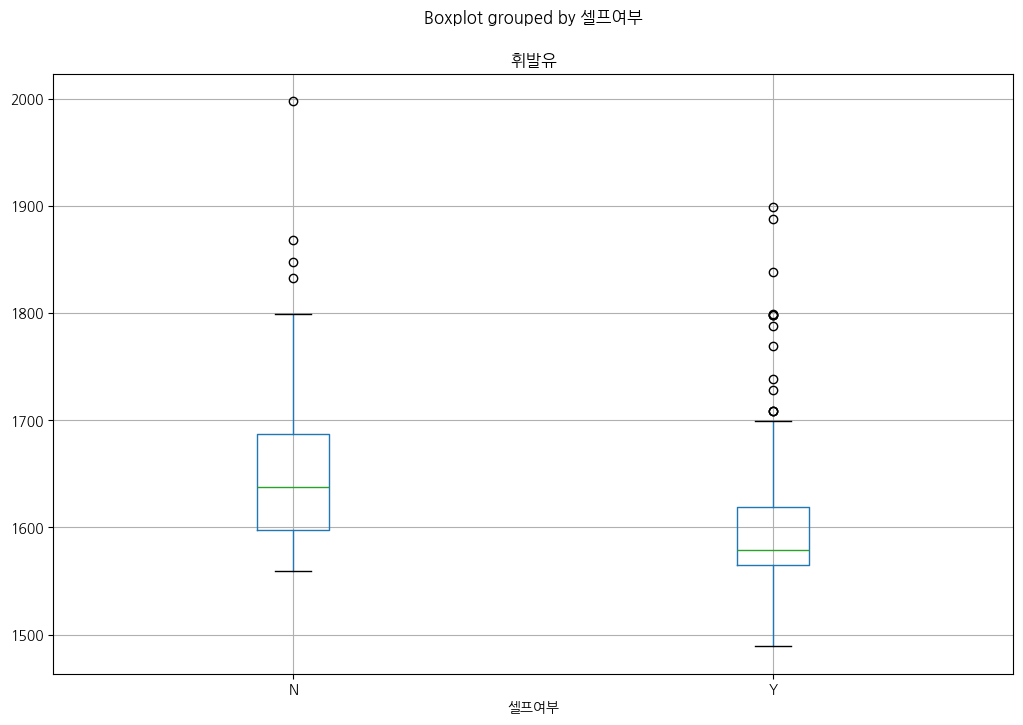

In [42]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)

total2.boxplot(column="휘발유", by="셀프여부" , figsize=(12,8))
plt.show()

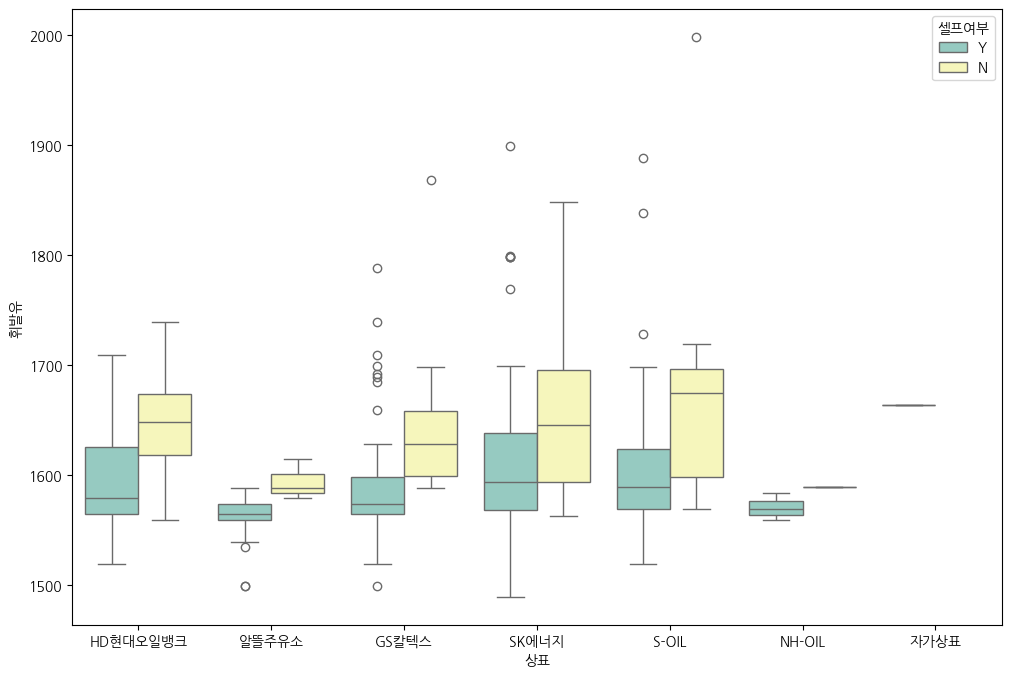

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표",y="휘발유", hue="셀프여부", data = total2, palette="Set3")
plt.show()

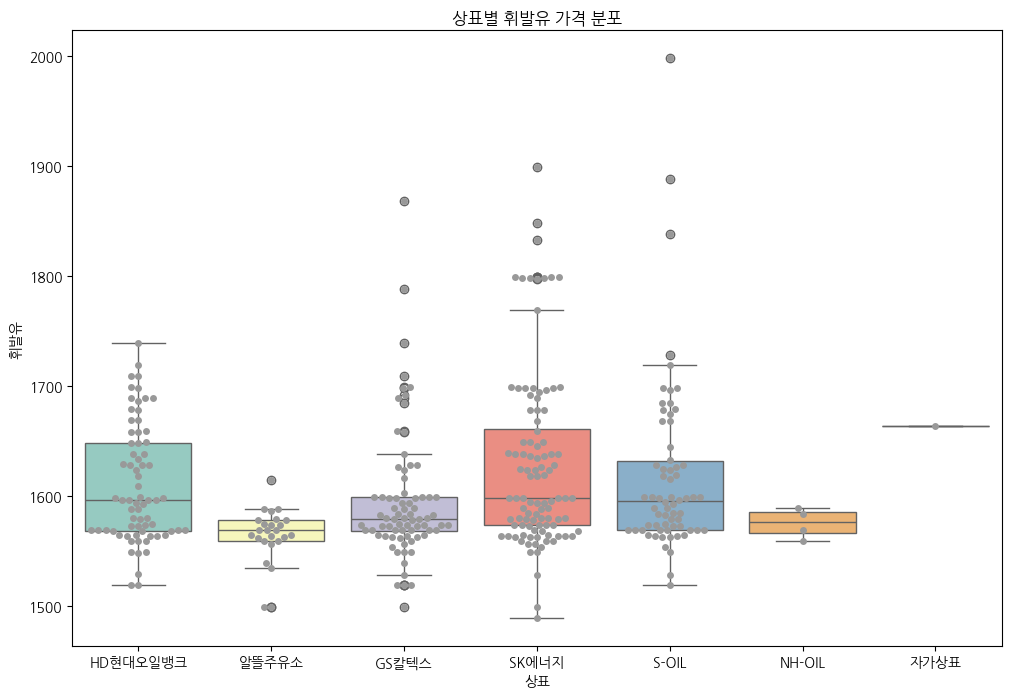

In [53]:
plt.figure(figsize=(12, 8))
# 박스플롯
sns.boxplot(x="상표", y="휘발유", data=total2, hue="상표", palette="Set3", legend=False)
# 스웜플롯
sns.swarmplot(x="상표", y="휘발유", data=total2, color=".6")

plt.title("상표별 휘발유 가격 분포")
plt.show()
